In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
xl = pd.ExcelFile('/content/drive/MyDrive/data1.xls')
xl.sheet_names
df = xl.parse("data2018")
df=df.replace(' ', np.nan)
df=df.dropna(how='all')

# Выберем признаки и целевую переменную
features = ['GDP_PPP', 'GDP_GROWTH', 'IMPORTS', 'EXPORTS', 'CHARGES', 'LABOR_FORCE', 'EDB', 'RESERVES', 'RATE', 'HCI']
target = 'FDI'

X = df[features]
y = df[target]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
y_scaled = scaler.fit_transform(y_imputed)
X_scaled_with_intercept = sm.add_constant(X_scaled)

In [ ]:
# модель OLS
model_ols = sm.OLS(y_scaled, X_scaled_with_intercept).fit()

model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     15.69
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           8.94e-21
Time:                        06:58:54   Log-Likelihood:                -246.48
No. Observations:                 217   AIC:                             515.0
Df Residuals:                     206   BIC:                             552.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.011e-18      0.052  -1.15e-16      1.000      -0.103       0.103
x1             0.9454      0.112      8.474      0.000       0.725       1.165
x2             0.0219      0.054      0.407      0.685      -0.084       0.128
x3             0.0438      0.094      0.466      0.642      -0.142       0.229
x4             0.0508      0.103      0.494      0.622      -0.152       0.253
x5            -0.2075      0.067     -3.119      0.002      -0.339      -0.076
x6            -0.2493      0.115     -2.175      0.031      -0.475      -0.023
x7             0.0345      0.077      0.450      0.653      -0.116       0.185
x8             0.0139      0.097      0.144      0.886      -0.178       0.205
x9             0.0487      0.055      0.892      0.373      -0.059       0.156
x10           -0.0399      0.086     -0.465      0.642      -0.209       0.129
==============================================================================
Omnibus:                      283.771   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40274.651
Skew:                          -5.269   Prob(JB):                         0.00
Kurtosis:                      68.904   Cond. No.                         5.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2 задание


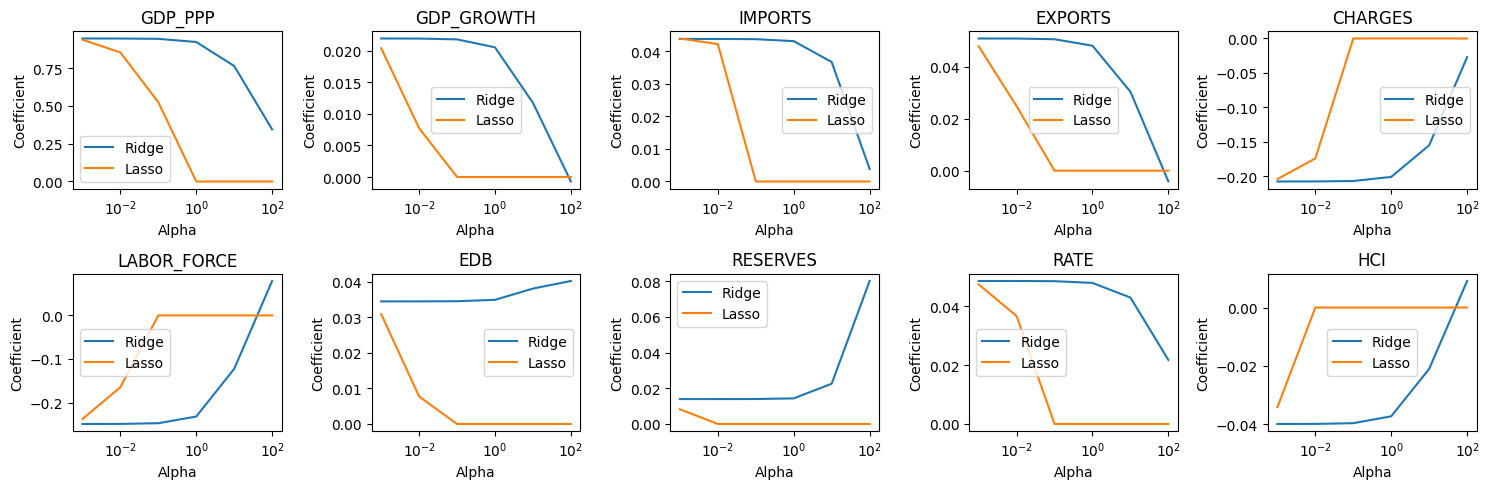

In [ ]:
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_coefs = []
lasso_coefs = []

for alpha in alpha_values:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_scaled, y_scaled)
    lasso_coefs.append(model_lasso.coef_)

    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_scaled, y_scaled)
    ridge_coefs.append(model_ridge.coef_.flatten())

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(15,5))
for i in range(len(features)):
    plt.subplot(2, 5, i + 1)
    plt.plot(alpha_values, ridge_coefs[:, i], label='Ridge')
    plt.plot(alpha_values, lasso_coefs[:, i], label='Lasso')
    plt.title(features[i])
    plt.xlabel('Alpha')
    plt.ylabel('Coefficient')
    plt.xscale('log')
    plt.legend()
plt.tight_layout()
plt.show()